# Machine Learning Workflow

**Goal: identify type of clothing from an image.**

In [1]:
import pickle

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### 1. Load Data

In [2]:
Ximages = pd.read_csv('fashion/fashion_mnist.csv', index_col=0)
ylabels = pd.read_csv('fashion/fashion_mnist_labels.csv')['0']

In [3]:
# check the size of our data set
Ximages.shape, ylabels.shape

((60000, 784), (60000,))

In [4]:
CLASSES = dict(zip(range(10), [
    "t-shirt", "trouser", "pullover", "dress", "coat",
    "sandal", "shirt", "sneaker", "bag", "boot"
]))
y = ylabels.replace(CLASSES)
y.head()

0       boot
1    t-shirt
2    t-shirt
3      dress
4    t-shirt
Name: 0, dtype: object

### 2. Inspect an image

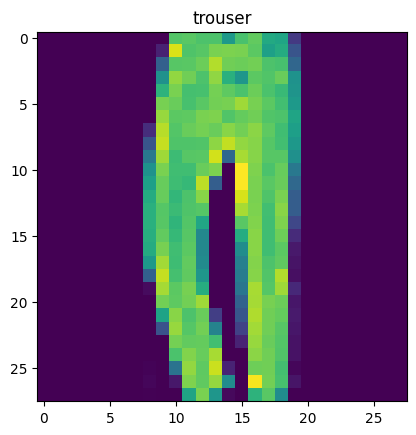

In [9]:
index = 71
im = Ximages.iloc[index].values.reshape(28, 28)
plt.imshow(im)
_ = plt.title(y[index])

### 3. Data Exploration

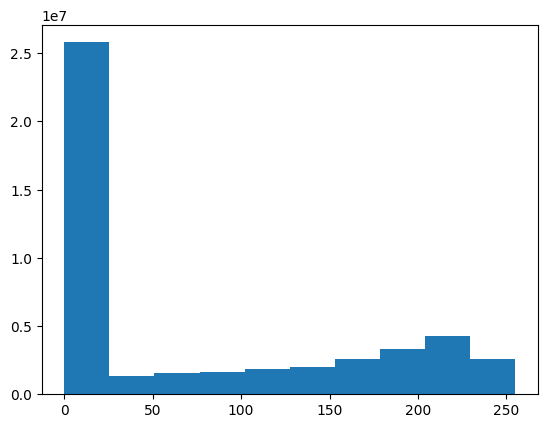

In [10]:
_ = plt.hist(Ximages.values.flatten(), bins=10)

### 4. Split training and validation data

In [11]:
Xtrain, Xval, ytrain, yval = train_test_split(Ximages, y, test_size=0.2, random_state=42)
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((48000, 784), (12000, 784), (48000,), (12000,))

### 5. Train a decision tree model

In [23]:
m = DecisionTreeClassifier(max_depth=20)  # we allow that many questions
m.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=20)

### 6. Evaluate the model

In [24]:
# evaluate on the training data
ypred = m.predict(Xtrain)
round(accuracy_score(ypred, ytrain), 3)

0.986

In [25]:
# evaluate on the validation data
ypred_val = m.predict(Xval)
round(accuracy_score(ypred_val, yval), 3)

0.805

#### Exercise: change the `max_depth` hyperparameter. What do you observe?

### 7. Train a random forest model

In [32]:
m = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42, n_jobs=-1)
m.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=42)

In [33]:
# evaluate on the training data
ypred = m.predict(Xtrain)
round(accuracy_score(ypred, ytrain), 3)

0.71

In [35]:
# evaluate on the validation data
ypred_val = m.predict(Xval)
round(accuracy_score(ypred_val, yval), 3)

0.703

### 8. Prediction for a sample image

In [37]:
index = 1
Xim = Ximages.iloc[[index]]  # matrix
m.predict(Xim)[0]

't-shirt'

### 9. Fine-tuning

#### Exercise: Sample a smaller training set (10%). How do the models change?

#### Exercise: Tune the hyperparameters so that you get a validation accuracy of at least 90% 

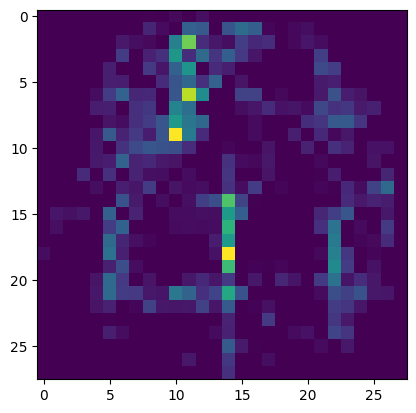

In [41]:
plt.imshow(m.feature_importances_.reshape(28, 28))

### 10. Save the model

In [ ]:
pickle.dump(m, open('fashion_forest.pkl', 'wb'))